In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x0 = 40; y0 = 30
vp = 4 # km/s
t0 = 0

In [3]:
# stasiun 1
stat1 = [20,10]; vp1 = 7.1

# stasiun 2
stat2 = [50,25]; vp2 = 2.8

# stasiun 3
stat3 = [40,50]; vp3 = 5.0

# stasiun 4
stat4 = [10,40]; vp4 = 7.9

# concat
xs = np.array([20,50,40,10])
ys = np.array([10,25,50,40])

## $t^{cal}_i = t_0 + \frac{\sqrt{(xs_i - x_0)^2 + (ys_i - y_0)^2}}{v_p} ; i = 1,...,N $

In [4]:
# persamaan menghitung travel time
def f(xsi,ysi, x0=40,y0=30):
    return t0 + np.sqrt((x0-xsi)**2 + (y0-ysi)**2)/(4)

def rmse(tcal,N):
    return np.sqrt((1/N)*(tcal-t0)**2)

In [5]:
t_obs = f(xs,ys)
t_obs

array([7.07106781, 2.79508497, 5.        , 7.90569415])

In [6]:
xgrid = np.arange(0,65,5)

ygrid = np.arange(0,65,5)

X,Y = np.meshgrid(xgrid,ygrid)
t_calc = f(X,Y)

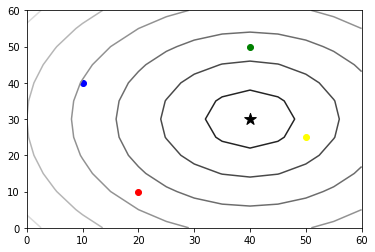

In [7]:
plt.scatter(stat1[0],stat1[1], c='red')
plt.scatter(stat2[0],stat2[1], c='yellow')
plt.scatter(stat3[0],stat3[1], c='green')
plt.scatter(stat4[0],stat4[1], c='blue')
plt.scatter(x0,y0, marker="*", c="black", s=150)
plt.contour(X, Y, t_calc, cmap="gray")

plt.xlim(0,60)
plt.ylim(0,60)
plt.show()

In [8]:
# model referensi
m_ref = [10,10] # x0,y0

# dtdx0 = ((m_ref[0]-xs)**2 + (m_ref[1]-ys)**2)**(1/2)*(m_ref[0]-xs)/vp
# dtdy0 = ((m_ref[0]-xs)**2 + (m_ref[1]-ys)**2)**(1/2)*(m_ref[1]-ys)/vp

iterasi = 10
misfit = np.array([np.inf])

for i in range(iterasi):
    print(m_ref)
    
    # forward modelling
    t_fm = f(xs,ys, m_ref[0], m_ref[1])
    delta_d = t_obs - t_fm
    
    # menghitung error
    rms = np.sqrt(np.mean(delta_d**2))
    misfit = np.append(misfit, rms)
    
    if np.isclose(misfit[i], misfit[i-1]) or misfit[i] == 0:
        break
    else:
        # matrix jacobi
        dtdx0 = (m_ref[0]-xs)/(vp*np.sqrt((m_ref[0]-xs)**2 + (m_ref[1]-ys)**2))
        dtdy0 = (m_ref[1]-ys)/(vp*np.sqrt((m_ref[0]-xs)**2 + (m_ref[1]-ys)**2))
        J = np.column_stack([dtdx0, dtdy0])

        m_calc = np.linalg.inv((J.T).dot(J)).dot(J.T).dot(delta_d)
        m_ref = m_ref + m_calc

[10, 10]
[17.45222727 25.55300817]
[38.53231068 29.84416438]
[39.99568685 29.98085654]
[39.9999969  30.00000313]
[40. 30.]
[40. 30.]
[40. 30.]


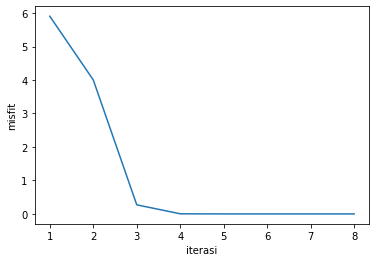

In [9]:
plt.plot(np.arange(len(misfit)), misfit)
plt.ylabel("misfit")
plt.xlabel("iterasi")
plt.show()